<h1><b>Carbon Footprint Engine - Initialization - Core tables creation</b></h1>

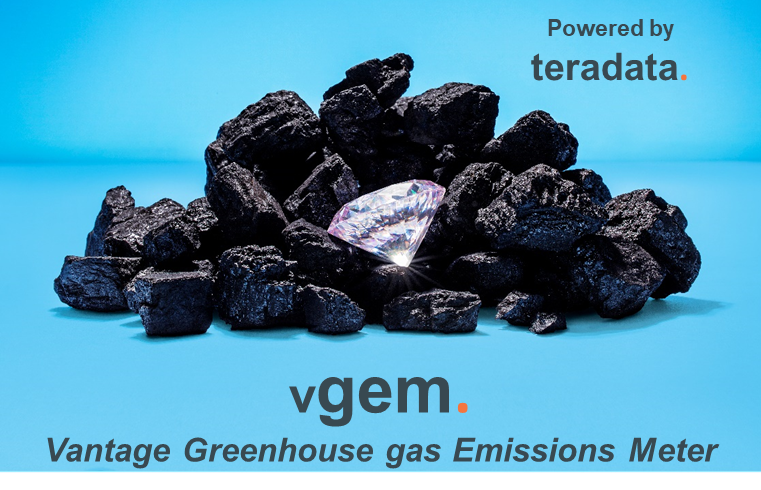

<p><b>This script initializes a data model to measure the companies greenhouse gas emissions</b></p>

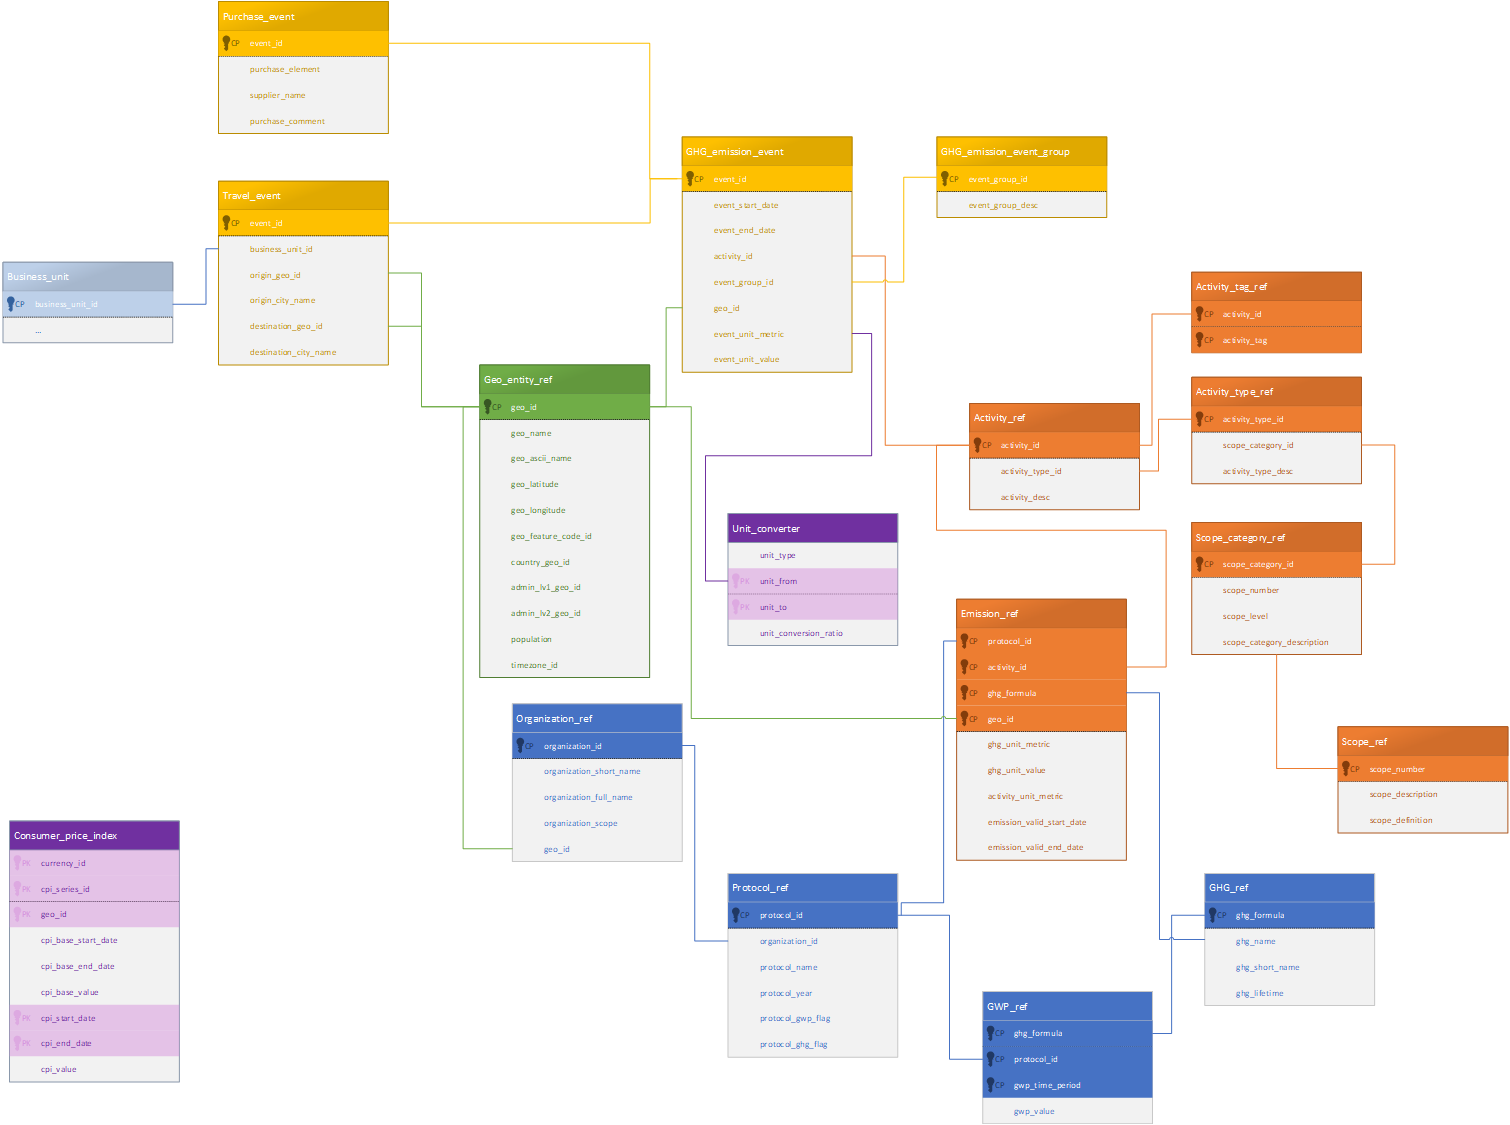

<h1>Settings</h1>

<h2>Database settings</h2>

In [1]:
%var vantageInstance               = "Transcend-Production-AWS"
    ,workingDatabase               = "ADLSLSEMEA_Scope3"
    ,greenAgendaPrefixe            = "GA2_"
    ,coreTablePrefixe              = "CORE_"

<h2>Entities (tables)</h2>

In [2]:
%var tbGhgRef          = "GHG_ref"
    ,tbOrganizationRef = "Organization_ref"
    ,tbProtocolRef     = "Protocol_ref"
    ,tbGwpRef          = "GWP_ref"
    ,tbScopeRef        = "Scope_ref"
    ,tbScopeCatgRef    = "Scope_category_ref"
    ,tbActTypeRef      = "Activity_type_ref"
    ,tbActRef          = "Activity_ref"
    ,tbActTagRef       = "Activity_tag_ref"
    ,tbEmissionRef     = "Emission_ref"
    ,tbGhgEmissEvt     = "GHG_emission_event"
    ,tbGhgEmissEvtGp   = "GHG_emission_event_group"
    ,tbPurchaseEvt     = "Purchase_event"
    ,tbTravelEvt       = "Travel_event"
    ,tbUnitConverter   = "Unit_converter"
    ,tbConsumerPrcIdx  = "Consumer_price_index"

<h2>Attributes (columns) and associated data types</h2>

In [3]:
%var colnmGeoId         = "geo_id"                     ,coltpGeoId         = "integer"
    ,colnmGhgFormula    = "ghg_formula"                ,coltpGhgFormula    = "varchar(7)"
    ,colnmGhgName       = "ghg_name"                   ,coltpGhgName       = "varchar(30)"
    ,colnmGhgShortNm    = "ghg_short_name"             ,coltpGhgShortNm    = "varchar(20)"
    ,colnmGhgLifetime   = "ghg_lifetime"               ,coltpGhgLifetime   = "integer"
    ,colnmOrgId         = "organization_id"            ,coltpOrgId         = "varchar(10)"
    ,colnmOrgShortNm    = "organization_short_name"    ,coltpOrgShortNm    = "varchar(20)"
    ,colnmOrgFullNm     = "organization_full_name"     ,coltpOrgFullNm     = "varchar(100)"
    ,colnmOrgScope      = "organization_scope"         ,coltpOrgScope      = "varchar(15)"
    ,colnmProtocolId    = "protocol_id"                ,coltpProtocolId    = "varchar(10)"
    ,colnmProtocolNm    = "protocol_name"              ,coltpProtocolNm    = "varchar(100) character set unicode"
    ,colnmProtocolYr    = "protocol_year"              ,coltpProtocolYr    = "smallint"
    ,colnmProtocolGwp   = "protocol_gwp_flag"          ,coltpProtocolGwp   = "byteint"
    ,colnmProtocolGhg   = "protocol_ghg_flag"          ,coltpProtocolGhg   = "byteint"
    ,colnmGwpTmPeriod   = "gwp_time_period"            ,coltpGwpTmPeriod   = "smallint"
    ,colnmGwpValue      = "gwp_value"                  ,coltpGwpValue      = "smallint"
    ,colnmScopeNum      = "scope_number"               ,coltpScopeNum      = "byteint"
    ,colnmScopeDesc     = "scope_description"          ,coltpScopeDesc     = "varchar(50)"
    ,colnmScopeDef      = "scope_definition"           ,coltpScopeDef      = "varchar(500)"
    ,colnmScopeCatgId   = "scope_category_id"          ,coltpScopeCatgId   = "char(4)"
    ,colnmScopeLvl      = "scope_level"                ,coltpScopeLvl      = "varchar(30)"
    ,colnmScopeCatgDesc = "scope_category_description" ,coltpScopeCatgDesc = "varchar(100)"
    ,colnmActTypeId     = "activity_type_id"           ,coltpActTypeId     = "char(7)"
    ,colnmActTypeDesc   = "activity_type_desc"         ,coltpActTypeDesc   = "varchar(100)"
    ,colnmActId         = "activity_id"                ,coltpActId         = "varchar(50)"
    ,colnmActDesc       = "activity_desc"              ,coltpActDesc       = "varchar(100)"
    ,colnmActTag        = "activity_tag"               ,coltpActTag        = "varchar(100)"
    ,colnmGhgUnitMetric = "ghg_unit_metric"            ,coltpUnitMetric    = "varchar(30)"
    ,colnmGhgUnitValue  = "ghg_unit_value"             ,coltpUnitValue     = "float"
    ,colnmActUnitMetric = "activity_unit_metric"
    ,colnmEmValdStart   = "emission_valid_start_date"  ,coltpEmValdStart   = "date"
    ,colnmEmValdEnd     = "emission_valid_end_date"    ,coltpEmValdEnd     = "date"
    ,colnmEmValDur      = "emission_valid_dur"
    ,colnmUnitType      = "unit_type"                  ,coltpUnitType      = "varchar(20)"
    ,colnmUnitFrom      = "unit_from"
    ,colnmUnitTo        = "unit_to"
    ,colnmUnitConvert   = "unit_conversion_ratio"      ,coltpUnitConvert   = "float"
    ,colnmCurrencyId    = "currency_id"
    ,colnmCpiSeriesID   = "cpi_series_id"              ,coltpCpiSeriesID   = "char(11)"
    ,colnmCpiBaseStart  = "cpi_base_start_date"
    ,colnmCpiBaseEnd    = "cpi_base_end_date"
    ,colnmCpiBaseValue  = "cpi_base_value"
    ,colnmCpiStart      = "cpi_start_date"             ,coltpCpiStart      = "date"
    ,colnmCpiEnd        = "cpi_end_date"               ,coltpCpiEnd        = "date"
    ,colnmCpiDur        = "cpi_valid_dur"
    ,colnmCpiValue      = "cpi_value"                  ,coltpCpiValue      = "float"
    ,colnmEventId       = "event_id"                   ,coltpEventId       = "bigint"
    ,colnmEventStart    = "event_start_date"           ,coltpEventStart    = "date"
    ,colnmEventEnd      = "event_end_date"             ,coltpEventEnd      = "date"
    ,colnmEventDur      = "event_dur"
    ,colnmEvtUnitMetric = "event_unit_metric"
    ,colnmEvtUnitValue  = "event_unit_value"
    ,colnmEventGpId     = "event_group_id"             ,coltpEventGpId     = "bigint"
    ,colnmEventGpDesc   = "event_group_desc"           ,coltpEventGpDesc   = "varchar(100)"
    ,colnmPurchaseElmt  = "purchase_element"           ,coltpPurchaseElmt  = "varchar(100)"
    ,colnmSupplierNm    = "supplier_name"              ,coltpSupplierNm    = "varchar(100)"
    ,colnmPurchaseComnt = "purchase_comment"           ,coltpPurchaseComnt = "varchar(500)"
    ,colnmBusnssUnitId  = "business_unit_id"           ,coltpBusnssUnitId  = "varchar(50)"
    ,colnmOrigGeoId     = "origin_geo_id"
    ,colnmOrigCityNm    = "origin_city_name"           ,coltpCityNm        = "varchar(50)"
    ,colnmDestGeoId     = "destination_geo_id"
    ,colnmDestCityNm    = "destination_city_name"


    ,temporalTransactionPeriod =
"sys_start   timestamp(6) with time zone not null generated always as row start
,sys_end     timestamp(6) with time zone not null generated always as row end
,period for system_time (sys_start,sys_end)
"

<h1>Connection to Vantage</h1>

In [4]:
%connect ${vantageInstance}

Success: 'Transcend-Production-AWS' connection established and activated for user 'gl186002'


<h1>Initializing core data model</h1>

<h2 style="color:blue">Greenhouse gas area - GHG_ref</h2>

In [5]:
drop table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbGhgRef};

Success: 49 rows affected

In [6]:
create table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbGhgRef}
(${colnmGhgFormula}  ${coltpGhgFormula}  not null
,${colnmGhgName}     ${coltpGhgName}     not null
,${colnmGhgShortNm}  ${coltpGhgShortNm}
,${colnmGhgLifetime} ${coltpGhgLifetime} not null

,${temporalTransactionPeriod}

,primary key (${colnmGhgFormula})
)
primary index (${colnmGhgFormula})
with system versioning
;

Success: 0 rows affected

<h2 style="color:blue">Greenhouse gas area - Organization_ref</h2>

In [7]:
drop table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbOrganizationRef};

Success: 53 rows affected

In [8]:
create table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbOrganizationRef}
(${colnmOrgId}      ${coltpOrgId}      not null
,${colnmOrgShortNm} ${coltpOrgShortNm} not null
,${colnmOrgFullNm}  ${coltpOrgFullNm}  not null
,${colnmOrgScope}   ${coltpOrgScope}   not null
,${colnmGeoId}      ${coltpGeoId}      not null

,${temporalTransactionPeriod}

,primary key (${colnmOrgId})
)
primary index (${colnmOrgId})
with system versioning
;

Success: 0 rows affected

<h2 style="color:blue">Greenhouse gas area - Protocol_ref</h2>

In [5]:
drop table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbProtocolRef};

Success: 58 rows affected

In [6]:
create table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbProtocolRef}
(${colnmProtocolId}  ${coltpProtocolId}  not null
,${colnmOrgId}       ${coltpOrgId}       not null
,${colnmProtocolNm}  ${coltpProtocolNm}  not null
,${colnmProtocolYr}  ${coltpProtocolYr}  not null
,${colnmProtocolGwp} ${coltpProtocolGwp} not null
,${colnmProtocolGhg} ${coltpProtocolGhg} not null

,${temporalTransactionPeriod}

,primary key (${colnmProtocolId})
)
primary index (${colnmProtocolId})
with system versioning
;

Success: 0 rows affected

<h2 style="color:blue">Greenhouse gas area - GWP_ref</h2>

In [11]:
drop table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbGwpRef};

Success: 59 rows affected

In [12]:
create table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbGwpRef}
(${colnmGhgFormula}  ${coltpGhgFormula}  not null
,${colnmProtocolId}  ${coltpProtocolId}  not null
,${colnmGwpTmPeriod} ${coltpGwpTmPeriod} not null
,${colnmGwpValue}    ${coltpGwpValue}    not null

,${temporalTransactionPeriod}

,primary key (${colnmGhgFormula},${colnmProtocolId},${colnmGwpTmPeriod})
)
primary index (${colnmProtocolId},${colnmGwpTmPeriod})
with system versioning
;

Success: 0 rows affected

<h2 style="color:orange">GHG emitting activities area - Scope_ref</h2>

In [13]:
drop table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbScopeRef};

Success: 47 rows affected

In [14]:
create table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbScopeRef}
(${colnmScopeNum}  ${coltpScopeNum}  not null
,${colnmScopeDesc} ${coltpScopeDesc} not null
,${colnmScopeDef}  ${coltpScopeDef}  not null

,${temporalTransactionPeriod}

,primary key (${colnmScopeNum})
)
primary index (${colnmScopeNum})
with system versioning
;

Success: 0 rows affected

<h2 style="color:orange">GHG emitting activities area - Scope_category_ref</h2>

In [15]:
drop table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbScopeCatgRef};

Success: 53 rows affected

In [16]:
create table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbScopeCatgRef}
(${colnmScopeCatgId}   ${coltpScopeCatgId}   not null
,${colnmScopeNum}      ${coltpScopeNum}      not null
,${colnmScopeLvl}      ${coltpScopeLvl}      not null
,${colnmScopeCatgDesc} ${coltpScopeCatgDesc} not null

,${temporalTransactionPeriod}

,primary key (${colnmScopeCatgId})
)
primary index (${colnmScopeCatgId})
unique index (${colnmScopeNum},${colnmScopeLvl},${colnmScopeCatgDesc})
with system versioning
;

Success: 0 rows affected

<h2 style="color:orange">GHG emitting activities area - Activity_type_ref</h2>

In [17]:
drop table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbActTypeRef};

Success: 49 rows affected

In [18]:
create table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbActTypeRef}
(${colnmActTypeId}   ${coltpActTypeId}   not null
,${colnmScopeCatgId} ${coltpScopeCatgId} not null
,${colnmActTypeDesc} ${coltpActTypeDesc} not null

,${temporalTransactionPeriod}

,primary key (${colnmActTypeId})
)
primary index (${colnmActTypeId})
with system versioning
;

Success: 0 rows affected

<h2 style="color:orange">GHG emitting activities area - Activity_ref</h2>

In [5]:
drop table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbActRef};

Success: 52 rows affected

In [6]:
create table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbActRef}
(${colnmActId}     ${coltpActId}     not null
,${colnmActTypeId} ${coltpActTypeId} not null
,${colnmActDesc}   ${coltpActDesc}   not null

,${temporalTransactionPeriod}

,primary key (${colnmActId})
)
primary index (${colnmActId})
with system versioning
;

Success: 0 rows affected

<h2 style="color:orange">GHG emitting activities area - Activity_tag_ref</h2>

In [7]:
drop table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbActTagRef};

Success: 54 rows affected

In [8]:
create table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbActTagRef}
(${colnmActId}  ${coltpActId}  not null
,${colnmActTag} ${coltpActTag} not null

,${temporalTransactionPeriod}

,primary key (${colnmActTag})
)
primary index (${colnmActId})
with system versioning
;

Success: 0 rows affected

<h2 style="color:orange">GHG emitting activities area - Emission_ref</h2>

In [21]:
drop table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbEmissionRef};

Success: 78 rows affected

In [22]:
create table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbEmissionRef}
(${colnmProtocolId}    ${coltpProtocolId}   not null
,${colnmActId}         ${coltpActId}        not null
,${colnmGhgFormula}    ${coltpGhgFormula}   not null
,${colnmGeoId}         ${coltpGeoId}        not null
,${colnmGhgUnitMetric} ${coltpUnitMetric}   not null
,${colnmGhgUnitValue}  ${coltpUnitValue}    not null
,${colnmActUnitMetric} ${coltpUnitMetric}   not null

,${colnmEmValdStart} ${coltpEmValdStart}    not null -- valid-start date
,${colnmEmValdEnd}   ${coltpEmValdEnd}      not null -- valid-end date
,period for ${colnmEmValDur} (${colnmEmValdStart},${colnmEmValdEnd}) as validtime

,${temporalTransactionPeriod}

,primary key (${colnmProtocolId},${colnmActId},${colnmGhgFormula},${colnmGeoId},${colnmEmValDur} without overlaps)
)
primary index(${colnmActId})
with system versioning
;

Success: 0 rows affected

<h2 style="color:#FFD133">GHG emission events area - GHG_emission_event</h2>

In [35]:
drop table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbGhgEmissEvt};

Success: 52 rows affected

In [36]:
create table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbGhgEmissEvt}
(${colnmEventId}       ${coltpEventId}    not null

,${colnmEventStart}    ${coltpEventStart} not null -- valid-start date
,${colnmEventEnd}      ${coltpEventEnd}   not null -- valid-end date
,period for ${colnmEventDur} (${colnmEventStart},${colnmEventEnd}) as validtime

,${colnmActId}         ${coltpActId}       not null
,${colnmEventGpId}     ${coltpEventGpId}
,${colnmGeoId}         ${coltpGeoId}       not null
,${colnmEvtUnitMetric} ${coltpUnitMetric}  not null
,${colnmEvtUnitValue}  ${coltpUnitValue}   not null

,${temporalTransactionPeriod}

,primary key (${colnmEventId},${colnmEventDur} without overlaps)
)
primary index (${colnmEventId})
with system versioning
;

Success: 0 rows affected

<h2 style="color:#FFD133">GHG emission events area - GHG_emission_event_group</h2>

In [25]:
drop table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbGhgEmissEvtGp};

Success: 37 rows affected

In [26]:
create table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbGhgEmissEvtGp}
(${colnmEventGpId}   ${coltpEventGpId}   not null
,${colnmEventGpDesc} ${coltpEventGpDesc} not null

,${temporalTransactionPeriod}

,primary key (${colnmEventGpId})

)
primary index (${colnmEventGpId})
with system versioning
;

Success: 0 rows affected

<h2 style="color:#FFD133">GHG emission events area - Purchase_event</h2>

In [9]:
drop table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbPurchaseEvt};

Success: 39 rows affected

In [10]:
create table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbPurchaseEvt}
(${colnmEventId}       ${coltpEventId}       not null
,${colnmPurchaseElmt}  ${coltpPurchaseElmt}  not null
,${colnmSupplierNm}    ${coltpSupplierNm}
,${colnmPurchaseComnt} ${coltpPurchaseComnt}
    
,${temporalTransactionPeriod}

,primary key (${colnmEventId})

)
primary index (${colnmEventId})
with system versioning
;

Success: 0 rows affected

<h2 style="color:#FFD133">GHG emission events area - Travel_event</h2>

In [5]:
drop table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbTravelEvt};

Success: 41 rows affected

In [6]:
create table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbTravelEvt}
(${colnmEventId}      ${coltpEventId}      not null
,${colnmBusnssUnitId} ${coltpBusnssUnitId}
,${colnmOrigGeoId}    ${coltpGeoId}        not null
,${colnmOrigCityNm}   ${coltpCityNm}       not null
,${colnmDestGeoId}    ${coltpGeoId}        not null
,${colnmDestCityNm}   ${coltpCityNm}       not null
    
,${temporalTransactionPeriod}

,primary key (${colnmEventId})

)
primary index (${colnmEventId})
with system versioning
;

Success: 0 rows affected

<h2 style="color:purple">Miscellaneous - Unit_converter</h2>

In [31]:
drop table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbUnitConverter};

Success: 56 rows affected

In [32]:
create table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbUnitConverter}
(${colnmUnitType} ${coltpUnitType}   not null
,${colnmUnitFrom} ${coltpUnitMetric} not null
,${colnmUnitTo}   ${coltpUnitMetric} not null
,unit_conversion_ratio float

,${temporalTransactionPeriod}

,primary key (${colnmUnitFrom},${colnmUnitTo} )
)
primary index (${colnmUnitType},${colnmUnitTo} )
with system versioning
;

Success: 0 rows affected

<h2 style="color:purple">Miscellaneous - Consumer_price_index</h2>

In [33]:
drop table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbConsumerPrcIdx};

Success: 76 rows affected

In [34]:
create table ${workingDatabase}.${greenAgendaPrefixe}${coreTablePrefixe}${tbConsumerPrcIdx}
(${colnmCurrencyId}   ${coltpUnitMetric}  not null
,${colnmCpiSeriesID}  ${coltpCpiSeriesID} not null
,${colnmGeoId}        ${coltpGeoId}       not null
,${colnmCpiBaseStart} ${coltpCpiStart}    not null
,${colnmCpiBaseEnd}   ${coltpCpiEnd}      not null
,${colnmCpiBaseValue} ${coltpCpiValue}    not null

,${colnmCpiStart}     ${coltpCpiStart}    not null -- valid-start date
,${colnmCpiEnd}       ${coltpCpiEnd}      not null -- valid-end date
,period for ${colnmCpiDur} (${colnmCpiStart},${colnmCpiEnd}) as validtime

,${colnmCpiValue}     ${coltpCpiValue}    not null


,${temporalTransactionPeriod}

,primary key (${colnmCurrencyId},${colnmCpiSeriesID},${colnmGeoId},${colnmCpiDur} without overlaps)
)
primary index(${colnmCurrencyId},${colnmCpiSeriesID})
with system versioning
;


Success: 0 rows affected